In [1]:
import pandas as pd

In [2]:
# Raw data from somewhere on internet! Thanks selva86!
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv")
data  = data.rename(columns = {"value": "passengers"})
data["month"] = [str(x) for x in pd.to_datetime(data.date).dt.to_period('m')]

In [3]:
data

,date,passengers,month
0,1949-01-01,112,1949-01
1,1949-02-01,118,1949-02
2,1949-03-01,132,1949-03
3,1949-04-01,129,1949-04
4,1949-05-01,121,1949-05
...,...,...,...
139,1960-08-01,606,1960-08
140,1960-09-01,508,1960-09
141,1960-10-01,461,1960-10
142,1960-11-01,390,1960-11


In [4]:
from utils import utils as utils

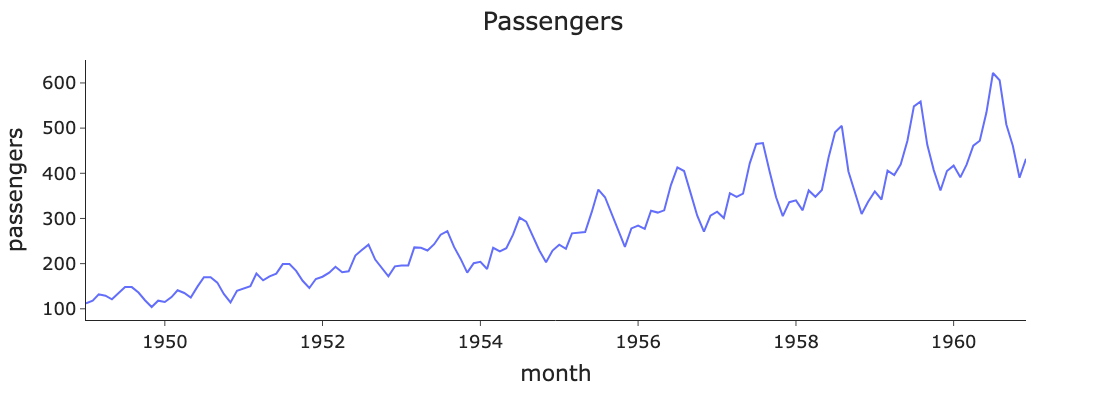

In [7]:
utils.plotting("Passengers", data, x="month", y="passengers", x_label="month", y_label="passengers")

In [8]:
# We do iyr differencing to see if we remove seasanality
data["passengers_diff_12m"] = data["passengers"].diff(periods = 12)

In [10]:
data.tail()

,date,passengers,month,passengers_diff_12m
139,1960-08-01,606,1960-08,47.0
140,1960-09-01,508,1960-09,45.0
141,1960-10-01,461,1960-10,54.0
142,1960-11-01,390,1960-11,28.0
143,1960-12-01,432,1960-12,27.0


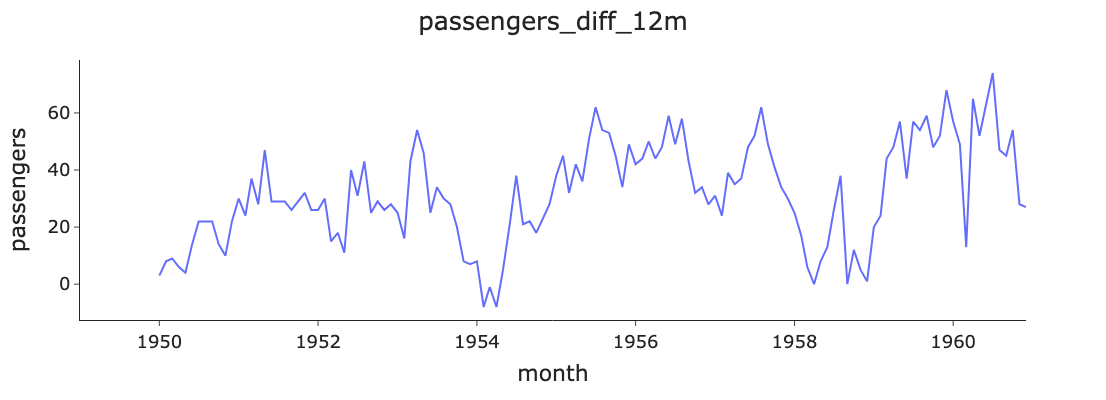

In [11]:
utils.plotting("passengers_diff_12m", data, x="month", y="passengers_diff_12m", x_label="month", y_label="passengers")

There might be more seasonality left! but clearly on 12m one

In [14]:
utils.test_adf(data["passengers_diff_12m"].dropna())

Statistic:  -3.383020726492481
p-value:  0.011551493085514952
critical values:
	1%: -3.48
	5%: -2.88
	10%: -2.58


Since p-value:  0.011, (and less than 5%, our significance level), we can say that we reject H0 (Series is non-stationary). Which means we accept that series is stationary